In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


# Story Outline

Goyani Bank, a leading financial institution specializing in Term Deposit Subscriptions, recognizes the significance of refining its marketing strategies for enhanced effectiveness. Leveraging data collected from various campaigns and user interactions, the bank aims to uncover valuable insights that will inform the optimization of future marketing initiatives. This imperative analysis of the last marketing campaign is poised to identify patterns, enabling the institution to draw meaningful conclusions and devise strategic enhancements for future endeavors. The overarching objective is to fortify the bank's market positioning and elevate the success quotient of upcoming marketing campaigns through informed decision-making and tailored strategies. This meticulous approach aligns with Goyani Bank's commitment to delivering exceptional financial solutions and services to its diverse clientele.

#  Attributes Description:

## Independet Features
###  Client Data:

1.  age: (numeric)

2.  job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education: (categorical: primary, secondary, tertiary and unknown)
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown')
8.  balance: Balance of the individual.

### Related with the last contact of the current campaign:

9.  contact: contact communication type (categorical: 'cellular','telephone')

10.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11.  day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then deposit='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

13.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15.  previous: number of contacts performed before this campaign and for this client (numeric)
16.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Dependent Feature**

17.  deposit: has the client subscribed a term deposit? (binary: 'yes','no')

# Importing Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='kaggle'
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# Reading the CSV File

In [3]:
df=pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')

In [4]:
#below function prints the basic information of dataset for clear understanding the dataset.
def SevenSigma(df):
    print(f"Shape of the dataset is : {df.shape}")
    print("")
    print("")
    print("Sample from Dataset")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("")
    print("")
    print("information of Dataset")
    display(df.info())
    print("")
    print("")
    print("description of Dataset for numeric features")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("")
    print("")
    print("description of Dataset for categorical features")
    display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
    print("")
    print("")
    print("corelation")
    sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2)
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()
    print("")
    print("")
    print("null values in dataset")
    display(df.isnull().mean()*100)
    print("")
    print("")
    print("duplicate rows in dataset")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

Shape of the dataset is : (11162, 17)


Sample from Dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2095,59,management,married,tertiary,no,2239,no,no,cellular,22,may,431,1,-1,0,unknown,yes
7803,33,blue-collar,single,primary,no,777,no,no,cellular,7,jul,263,1,-1,0,unknown,no
8786,56,blue-collar,married,secondary,no,771,yes,yes,unknown,19,jun,254,1,-1,0,unknown,no
3918,25,student,single,secondary,no,154,no,no,cellular,2,sep,382,1,183,3,success,yes
3734,48,unemployed,married,secondary,no,817,no,no,cellular,16,jul,806,3,183,5,success,yes




information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


None



description of Dataset for numeric features


,count,mean,std,min,25%,50%,75%,max
age,11162.000000,41.231948,11.913369,18.000000,32.000000,39.000000,49.000000,95.000000
balance,11162.000000,1528.538524,3225.413326,-6847.000000,122.000000,550.000000,1708.000000,81204.000000
day,11162.000000,15.658036,8.420740,1.000000,8.000000,15.000000,22.000000,31.000000
duration,11162.000000,371.993818,347.128386,2.000000,138.000000,255.000000,496.000000,3881.000000
campaign,11162.000000,2.508421,2.722077,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,11162.000000,51.330407,108.758282,-1.000000,-1.000000,-1.000000,20.750000,854.000000
previous,11162.000000,0.832557,2.292007,0.000000,0.000000,0.000000,1.000000,58.000000




description of Dataset for categorical features


,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873




corelation


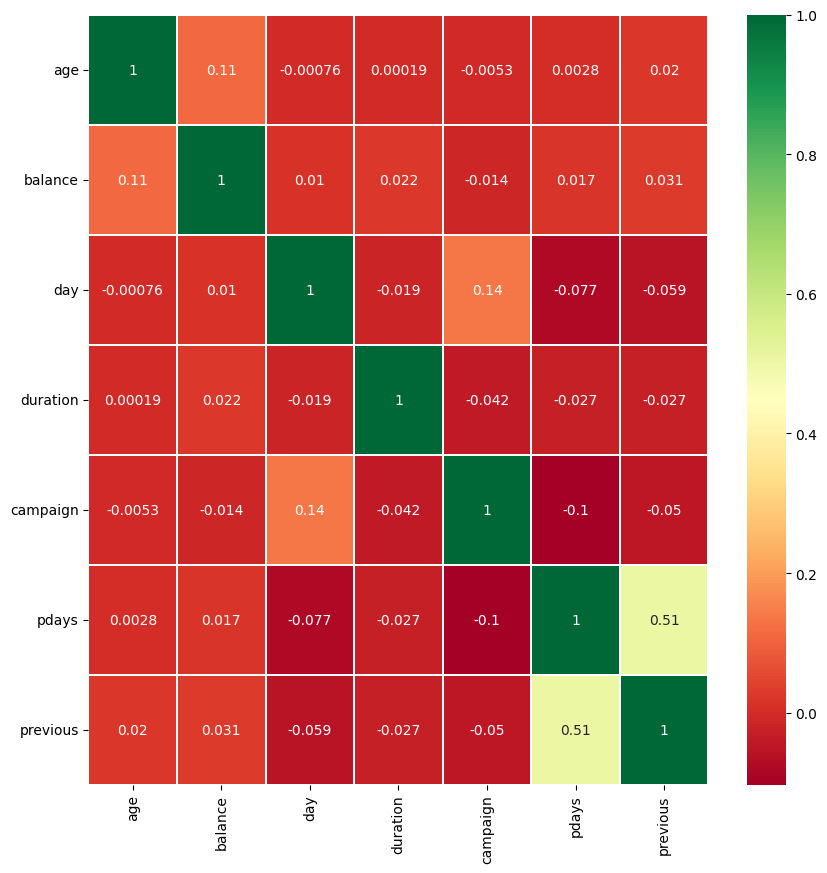



null values in dataset


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64



duplicate rows in dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [5]:
SevenSigma(df)

In [6]:
df.sample(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6127,37,management,married,tertiary,no,6014,yes,no,cellular,15,jul,163,6,-1,0,unknown,no
11124,42,retired,married,primary,no,0,yes,no,unknown,8,may,186,2,-1,0,unknown,no
3468,63,retired,married,primary,no,12067,no,no,telephone,29,apr,660,1,191,1,failure,yes
3748,35,admin.,single,secondary,no,321,no,no,cellular,21,jul,143,1,412,3,other,yes
2410,59,blue-collar,divorced,primary,no,989,no,no,cellular,20,jul,125,2,-1,0,unknown,yes
2877,37,management,married,tertiary,no,238,no,no,cellular,3,nov,149,1,-1,0,unknown,yes
10837,39,technician,married,tertiary,no,94,no,no,cellular,7,aug,70,2,-1,0,unknown,no
7537,50,blue-collar,divorced,secondary,no,203,yes,no,telephone,19,nov,265,1,127,4,other,no
7099,28,management,single,tertiary,no,466,yes,no,cellular,23,jul,170,2,-1,0,unknown,no
2975,26,blue-collar,single,tertiary,no,644,no,no,cellular,2,dec,346,1,-1,0,unknown,yes


# Demographic Analysis:

In [7]:
#
px.pie(df,'job',title='Distribution of Job')

In [8]:
px.histogram(df,x='marital',text_auto=True,title='marital status')

In [9]:
px.histogram(df,x='education',text_auto=True,title='Education Type')

In [10]:

# Sample data for the four box plots
data1 = df['default']
data2 =df['housing']
data3 = df['loan']

# Create subplots
fig = make_subplots(rows=1, cols=3,specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                    subplot_titles=['has credit in default?','has housing loan?','has personal loan?'])

# Add box plots to the subplots
fig.add_trace(go.Pie(labels=data1), row=1, col=1)
fig.add_trace(go.Pie(labels=data2),row =1, col=2)
fig.add_trace(go.Pie(labels=data3), row=1, col=3)


# Update layout
fig.update_layout(title="Credit and Loan information", showlegend=True)

# Show the plot
fig.show()


In [11]:
temp1=pd.DataFrame(df['contact'].value_counts(),index=None)
temp2=pd.DataFrame(df['poutcome'].value_counts(),index=None)

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['Contact communication type',
                                   'outcome of previous marketing campaign'])
fig.add_trace(go.Funnel(y=list(temp1.index),x=temp1['count']),row=1,col=1)
fig.add_trace(go.Funnel(y=list(temp2.index),x=temp2['count']),row=1,col=2)

fig.update_layout(title="information regrading coomunication type and it's outcome",showlegend=False)

fig.show()

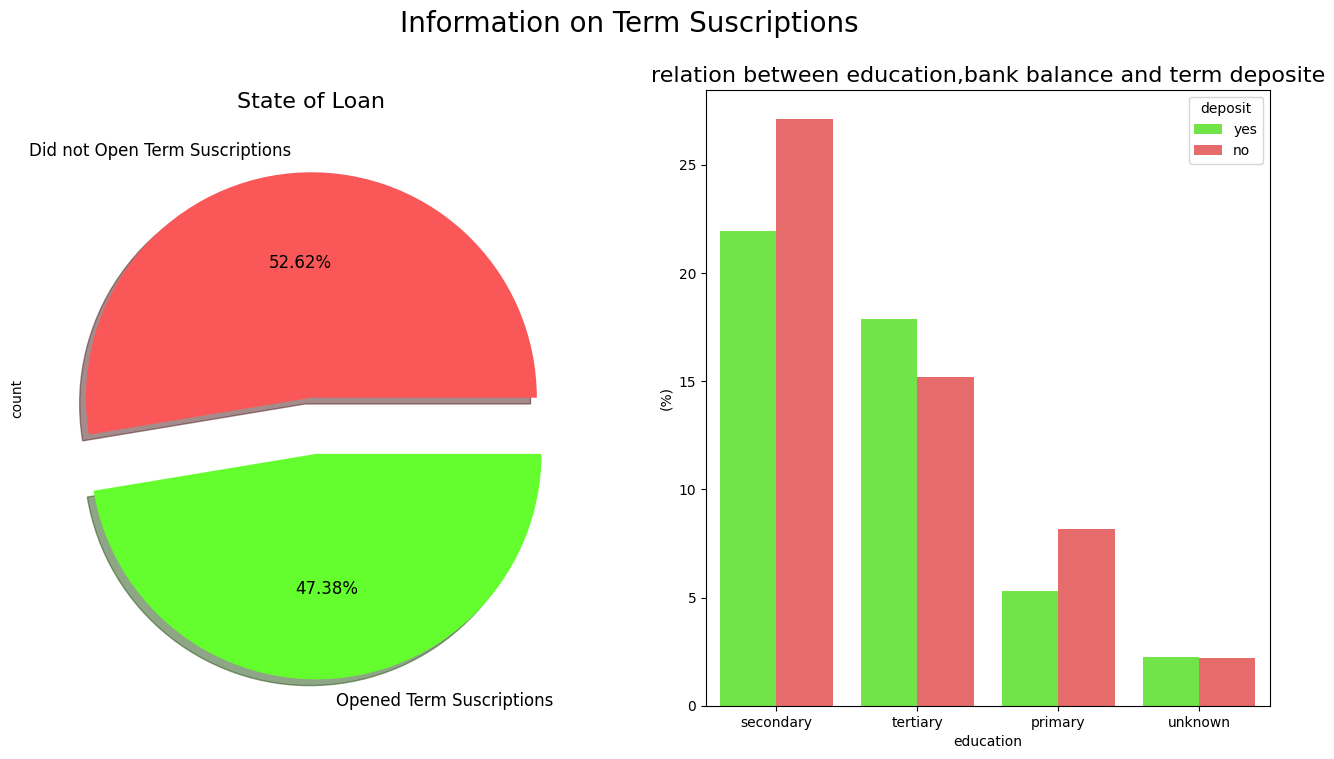

In [12]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12)


ax[0].set_title('State of Loan', fontsize=16)


# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_title('relation between education,bank balance and term deposite', fontsize=16)
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

In [13]:
numeric_features=df.select_dtypes(exclude='object').columns
numeric_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [14]:
fig=make_subplots(rows=4,cols=2,subplot_titles=['Age Distribution', 'Balance Distribution', 'Day Distribution', 'Duration Distribution', 'Campaign Distribution', 'Pdays Distribution', 'Previous Distribution'])

fig.add_trace(go.Violin(x=df['age'],showlegend=False),row=1,col=1)
fig.add_trace(go.Violin(x=df['balance'],showlegend=False),row=1,col=2)
fig.add_trace(go.Violin(x=df['day'],showlegend=False),row=2,col=1)
fig.add_trace(go.Violin(x=df['duration'],showlegend=False),row=2,col=2)
fig.add_trace(go.Violin(x=df['campaign'],showlegend=False),row=3,col=1)
fig.add_trace(go.Violin(x=df['pdays'],showlegend=False),row=3,col=2)
fig.add_trace(go.Violin(x=df['previous'],showlegend=False),row=4,col=1)

fig.update_layout(height=1200, width=1000)

# Update subplot titles
fig.update_layout(
    title_text="Distributions of Numeric Features",
    title_x=0.5,
    title_y=0.95,
    title_font_size=20,
    title_font_color="black",
)

fig.update_traces(box_visible=True, meanline_visible=True,showlegend=False)
fig.show()

In [15]:
suscribed_df = df

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

traces = []

for xd, yd in zip(occupations, ages):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
     
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
         gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [16]:
'''import plotly.express as px


# Create a grouped bar chart
fig = px.bar(df, x='job', y='age', color='deposit', barmode='relative')

# Show the plot
fig.show()
'''

"import plotly.express as px\n\n\n# Create a grouped bar chart\nfig = px.bar(df, x='job', y='age', color='deposit', barmode='relative')\n\n# Show the plot\nfig.show()\n"

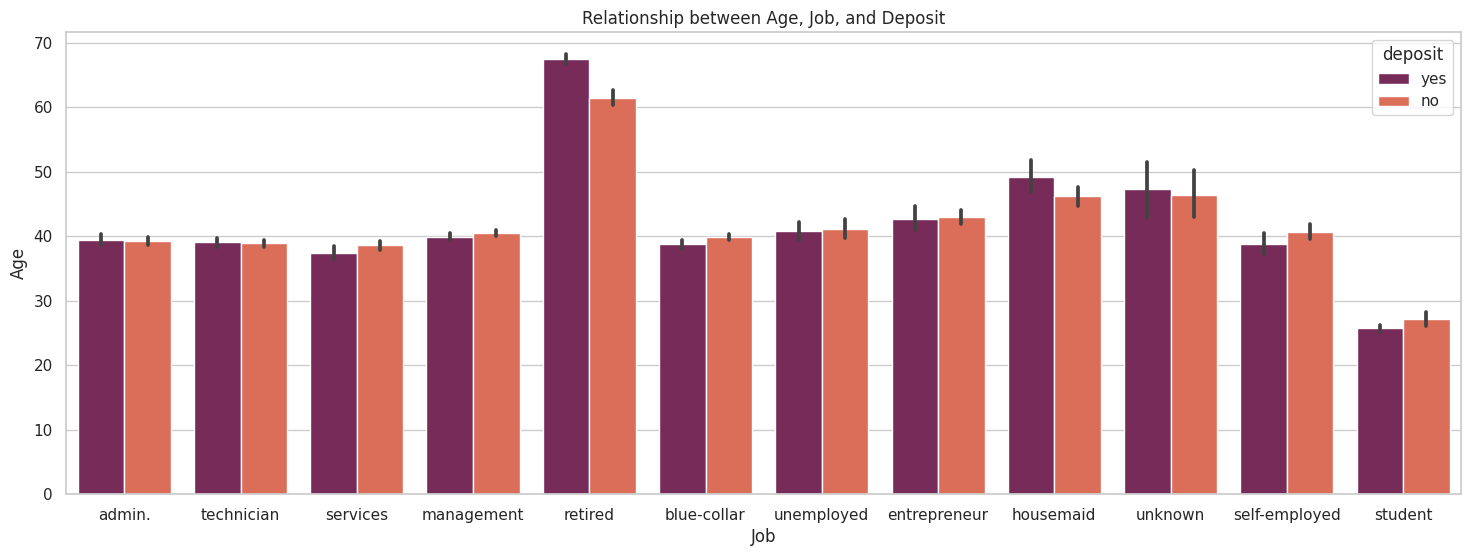

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a grouped bar chart using seaborn
plt.figure(figsize=(18, 6))
sns.barplot(x='job', y='age', hue='deposit', data=df, palette='rocket')

# Set plot labels and title
plt.xlabel('Job')
plt.ylabel('Age')
plt.title('Relationship between Age, Job, and Deposit')

# Show the plot
plt.show()
